In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


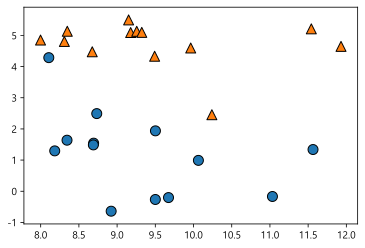

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

(-3.0, 3.0)

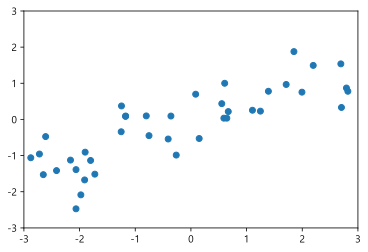

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [12]:
cancer = load_breast_cancer()
cancer.keys(), cancer['target_names'], cancer['feature_names'], cancer['data'].shape

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (569, 30))

In [11]:
cancer['data'].shape

(569, 30)

In [15]:
{name: v for name, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


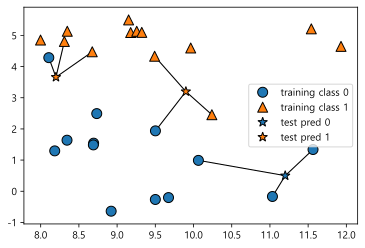

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [21]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_clf.predict(X_test), y_test, np.mean(knn_clf.predict(X_test) == y_test), knn_clf.score(X_test, y_test)

(array([1, 0, 1, 0, 1, 0, 0]),
 array([1, 0, 1, 0, 1, 1, 0]),
 0.8571428571428571,
 0.8571428571428571)

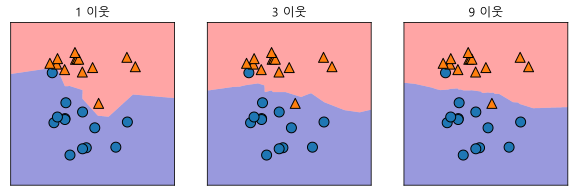

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, alpha=0.4, ax=ax)
    ax.set_title(f'{n_neighbor} 이웃')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

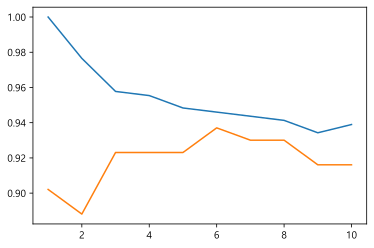

In [40]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbor in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy)
plt.plot(neighbors_settings, test_accuracy)

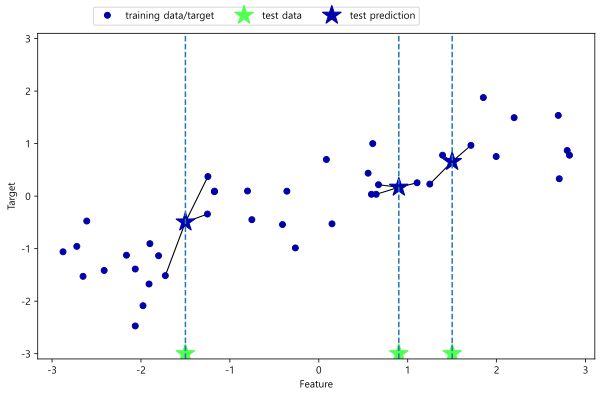

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
knn_reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_reg.predict(X_test), knn_reg.score(X_test, y_test)

(array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
        -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398]),
 0.8344172446249605)

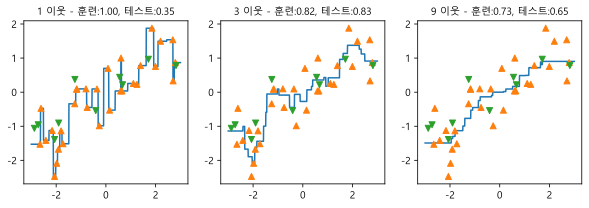

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbor).fit(X_train, y_train)
    ax.plot(line, knn_reg.predict(line))
    ax.plot(X_train, y_train, '^')
    ax.plot(X_test, y_test, 'v')
    ax.set_title(f'{n_neighbor} 이웃 - 훈련:{knn_reg.score(X_train, y_train):.2f}, 테스트:{knn_reg.score(X_test, y_test):.2f}', fontsize=10)